# HoughLine() method

### import library

In [1]:
import cv2 
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Read Image
##### We will use an image we created in an excercise earlier.

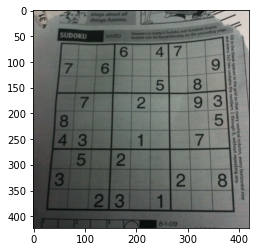

In [2]:
image = cv2.imread('sudoku.jpg')
plt.imshow(image)

## Preprocessing the image
#### We will convert the image to greyscale and run a Gaussian filter to remove small edges

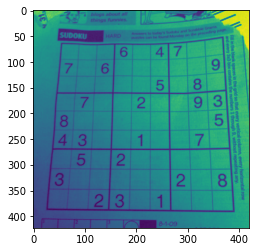

In [4]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

plt.imshow(gray)

## Create edges with Canny Edge Detector¶
### We will use Canny edge detection to create edges

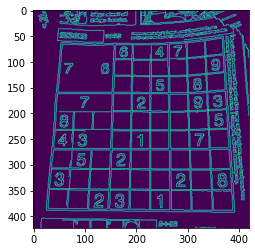

In [5]:
edges = cv2.Canny(gray,50,150,apertureSize = 3)
plt.imshow(edges)

## Apply HoughLines
We will apply Hough lines. The parameted used are as follows

### 1.edges: Output of the edge detector.
### 2.lines: A vector to store the coordinates of the start and end of the line.
### 3.rho: The resolution parameter \rho in pixels
### 4.theta: The resolution of the parameter \theta in radians.
### 5.threshold: The minimum number of intersecting points to detect a line.

Hough transforms models lines in its polar coordinate form rho = xcos(theta) + ysin(theta)

Each pixel on an edge is mapped to lines which are represented theta and rhos. If the distance of an edge point is less maxLineGap, then it is assumed that edge lies on that line. The lines which has edge pixels greater than a minLineLength are finally identified and saved.

In [7]:
lines = cv2.HoughLines(edges,1,np.pi/180,200)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
    x1 = int(x0 + 1000*(-b))
    # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
    y1 = int(y0 + 1000*(a))
    # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
    x2 = int(x0 - 1000*(-b))
    # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
    y2 = int(y0 - 1000*(a))
    cv2.line(image,(x1,y1),(x2,y2),(0,0,255),2)

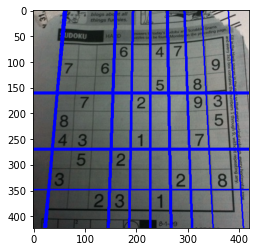

In [8]:
plt.imshow(image)

# HoughLinesP() method

## import library

In [9]:
import cv2 
import numpy as np

### read image

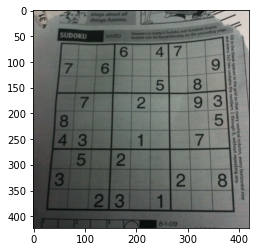

In [11]:
img = cv2.imread('sudoku.jpg')
plt.imshow(img)

## Preprocessing the image
#### We will convert the image to greyscale and run a Gaussian filter to remove small edges

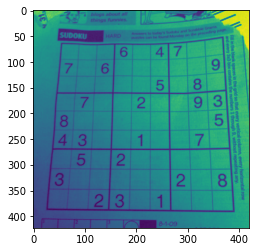

In [13]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

## Create edges with Canny Edge Detector¶
#### We will use Canny edge detection to create edges

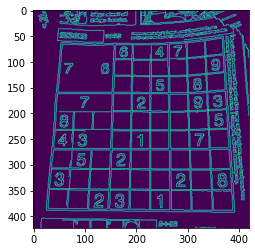

In [14]:
edges = cv2.Canny(gray,50,150,apertureSize = 3)
plt.imshow(edges)

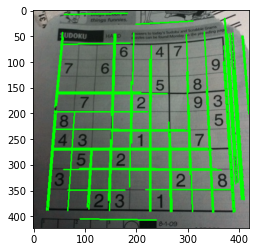

In [16]:
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
plt.imshow(img)